# Visualise Scores

In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Read excel overview
path_results = os.path.join('..', 'output')
df_scores = pd.read_excel(os.path.join(path_results, 'scores_overview.xlsx'), index_col=[0,1])
df_scores

IOU    Dice     TPR     TNR  FNBGR_0  \
unet_256_aug_ce_2_00   0       0.8345  0.9000  0.9348  0.9795   0.0563   
                       1       0.8335  0.8913  0.8978  0.9869   0.0870   
                       2       0.8111  0.8756  0.8769  0.9859   0.0975   
                       3       0.8323  0.8876  0.8815  0.9896   0.0978   
                       4       0.8435  0.9046  0.8997  0.9883   0.0855   
...                               ...     ...     ...     ...      ...   
unetbn_nonaug_iou_3_00 4       0.8899  0.9371  0.9592  0.9949   0.0310   
                       mean    0.7768  0.8349  0.9474  0.9166   0.0393   
                       std     0.2093  0.1937  0.0256  0.1573   0.0184   
                       median  0.8814  0.9321  0.9368  0.9949   0.0478   
                       iqr     0.0171  0.0117  0.0317  0.0008   0.0232   

                               FNBGR_1  
unet_256_aug_ce_2_00   0        0.1234  
                       1        0.1462  
                       2        0.2070  
                       3        0.1833  
                       4        0.2365  
...                                ...  
unetbn_nonaug_iou_3_00 4        0.1098  
                       mean     0.1394  
                       std      0.0612  
                       median   0.1799  
                       iqr      0.0705  

[648 rows x 6 columns]

In [3]:
df_scores.index.get_level_values(0).unique()

Index(['unet_256_aug_ce_2_00', 'unet_256_aug_ce_3_00', 'unet_256_aug_fce_2_00',
       'unet_256_aug_fce_3_00', 'unet_256_aug_iou_2_00',
       'unet_256_aug_iou_3_00', 'unet_256_littleaug_ce_2_00',
       'unet_256_littleaug_ce_3_00', 'unet_256_littleaug_fce_2_00',
       'unet_256_littleaug_fce_3_00', 'unet_256_littleaug_iou_2_00',
       'unet_256_littleaug_iou_3_00', 'unet_256_nonaug_ce_2_00',
       'unet_256_nonaug_ce_3_00', 'unet_256_nonaug_fce_2_00',
       'unet_256_nonaug_fce_3_00', 'unet_256_nonaug_iou_2_00',
       'unet_256_nonaug_iou_3_00', 'unet_aug_ce_2_00', 'unet_aug_ce_3_00',
       'unet_aug_fce_2_00', 'unet_aug_fce_3_00', 'unet_aug_iou_2_00',
       'unet_aug_iou_3_00', 'unet_littleaug_ce_2_00', 'unet_littleaug_ce_3_00',
       'unet_littleaug_fce_2_00', 'unet_littleaug_fce_3_00',
       'unet_littleaug_iou_2_00', 'unet_littleaug_iou_3_01',
       'unet_nonaug_ce_2_00', 'unet_nonaug_ce_3_00', 'unet_nonaug_fce_2_00',
       'unet_nonaug_fce_3_00', 'unet_nonaug_iou_2_

In [4]:
# make dict of dataframes separated by tile size and wear_mode
scores_dict = {}
res = {'scores_512_2':r'^(?!.*256).*_2_',
      'scores_256_2':r'256\w*_2_',
      'scores_512_3':r'^(?!.*256).*_3_',
      'scores_256_3':r'256\w*_3_'}

for k, v in res.items():
    df = df_scores.filter(regex=v, axis=0)
    print(df)
    df['aug'] = df.index.get_level_values(0).str.split('_').str[-4]
    df['model'] = df.index.get_level_values(0).str.replace(r'_((little|non))?aug', '', regex=True)
    df['model'] = df['model'].replace('_(2|3)_\d*', '', regex=True)
    scores_dict[k] = df[df.index.get_level_values(1).isin(range(0,5))]

                                  IOU    Dice     TPR     TNR  FNBGR_0  \
unet_aug_ce_2_00       0       0.7471  0.8342  0.9514  0.9812   0.0431   
                       1       0.7334  0.8120  0.8366  0.9909   0.1577   
                       2       0.8187  0.8878  0.8870  0.9940   0.0981   
                       3       0.8110  0.8745  0.8938  0.9924   0.0935   
                       4       0.8184  0.8847  0.9097  0.9948   0.0612   
...                               ...     ...     ...     ...      ...   
unetbn_nonaug_iou_2_03 4       0.8767  0.9286  0.9371  0.9950   0.0495   
                       mean    0.8738  0.9251  0.9365  0.9953   0.0472   
                       std     0.0104  0.0103  0.0020  0.0002   0.0030   
                       median  0.8781  0.9293  0.9371  0.9953   0.0474   
                       iqr     0.0023  0.0021  0.0019  0.0003   0.0026   

                               FNBGR_1  
unet_aug_ce_2_00       0        0.0860  
                       1     

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4152\3298265736.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aug'] = df.index.get_level_values(0).str.split('_').str[-4]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4152\3298265736.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df.index.get_level_values(0).str.replace(r'_((little|non))?aug', '', regex=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4152\3298265736.py:13: SettingWithC

                                      IOU    Dice     TPR     TNR  FNBGR_0  \
unet_256_aug_ce_2_00       0       0.8345  0.9000  0.9348  0.9795   0.0563   
                           1       0.8335  0.8913  0.8978  0.9869   0.0870   
                           2       0.8111  0.8756  0.8769  0.9859   0.0975   
                           3       0.8323  0.8876  0.8815  0.9896   0.0978   
                           4       0.8435  0.9046  0.8997  0.9883   0.0855   
...                                   ...     ...     ...     ...      ...   
unetbn_256_nonaug_iou_2_01 4       0.8963  0.9412  0.9373  0.9885   0.0450   
                           mean    0.8883  0.9335  0.9499  0.9839   0.0391   
                           std     0.0109  0.0107  0.0091  0.0048   0.0048   
                           median  0.8963  0.9412  0.9471  0.9846   0.0392   
                           iqr     0.0223  0.0191  0.0140  0.0046   0.0088   

                                   FNBGR_1  
unet_256_aug_ce_2_

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4152\3298265736.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].replace('_(2|3)_\d*', '', regex=True)


In [5]:
# # make dict of dataframes separated by tile size and wear_mode
# scores_dict = {}
# res = {'scores_512_2':r'^(?!.*bn)(?!.*256).*_2_', 
#        'scores_bn_512_2':r'bn.*(?!.*256).*_2_', 
#       'scores_256_2':r'256\w*_2_',
#       'scores_512_3':r'^(?!.*256).*_3_',
#       'scores_256_3':r'256\w*_3_',}

# for k, v in res.items():
#     df = df_scores.filter(regex=v, axis=0)
#     df['aug'] = df.index.get_level_values(0).str.split('_').str[-4]
#     df['model'] = df.index.get_level_values(0).str.replace(r'_((little|non))?aug', '', regex=True)
#     df['model'] = df['model'].replace('_(2|3)_\d*', '', regex=True)
#     scores_dict[k] = df[df.index.get_level_values(1).isin(range(0,5))]

In [6]:
path_figs = os.path.join(path_results, 'figures')
os.makedirs(path_figs, exist_ok=True)

In [7]:
def change_labels(old_labels):
    new_labels = [item.get_text() for item in old_labels]
    for i, l in enumerate(new_labels):
        if ('_ce') in l:
            new_labels[i] = 'CE'
        elif ('_fce') in l:
            new_labels[i] = 'FCE'
        elif ('_iou') in l:
            new_labels[i] = '$L_{\mathrm{IoU}}$'
        if ('bn_') in l:
            new_labels[i] = new_labels[i] + '+BN'
    return new_labels

In [8]:
plt.rcParams.update({'font.size': 12})

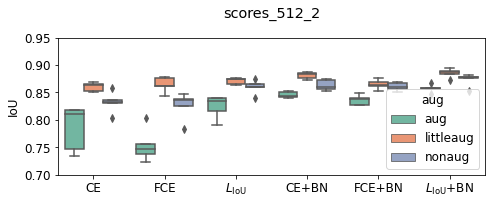

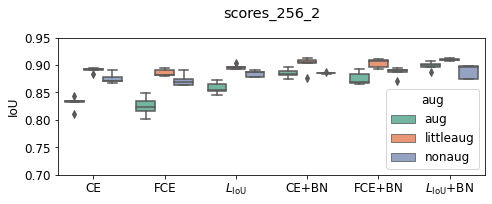

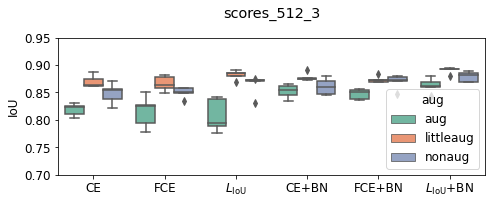

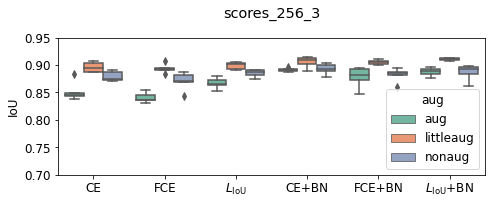

In [12]:
score = 'IoU'
first = True
for model, scores in scores_dict.items():
    df = scores.reset_index()
    plt.figure(figsize=(7, 3))

    ax = sns.boxplot(x='model', y=score.upper(), data=df, hue='aug', palette="Set2")
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(model, pad=20)
    plt.xlabel('')
    new_labels = change_labels(ax.get_xticklabels())
    ax.set_xticklabels(new_labels)
    plt.ylim([0.7, .95])
    plt.ylabel(score)
#     if first:
#         handles, _ = ax.get_legend_handles_labels()
#         plt.legend(title='train data augmentation:', handles=handles, labels=["full", "moderate", "none"], ncol=3, loc='lower right')
#         first = False
#     else:
#         ax.legend().set_visible(False)
    
    #plt.locator_params(nbins=4)
    plt.tight_layout()
    plt.savefig(os.path.join(path_figs, f'boxplots_{model}_{score}.jpg'), dpi=300)
    plt.show()

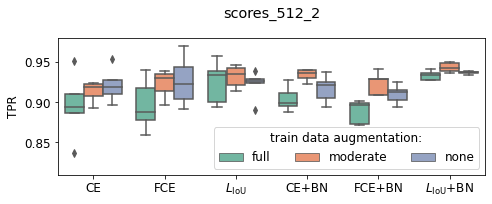

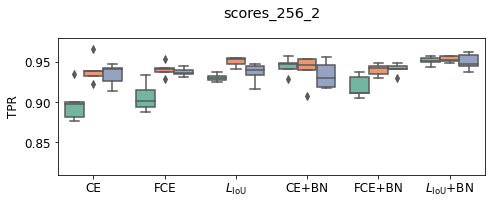

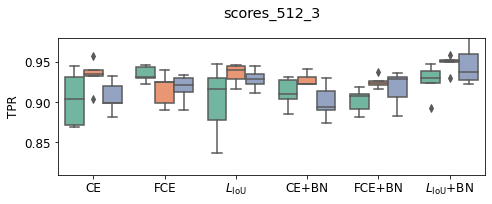

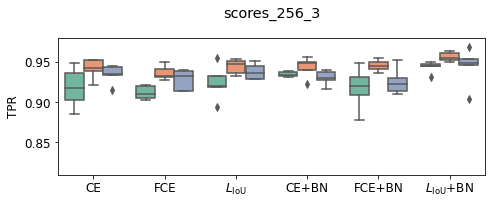

In [10]:
score = 'TPR'
first = True
for model, scores in scores_dict.items():
    df = scores.reset_index()
    plt.figure(figsize=(7, 3))
    ax = sns.boxplot(x='model', y=score, data=df, hue='aug', palette="Set2")
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(model, pad=20)
    plt.xlabel('')
    new_labels = change_labels(ax.get_xticklabels())
    ax.set_xticklabels(new_labels)
    plt.ylim([0.81, 0.98])
    plt.ylabel(score)
    if first:
        handles, _ = ax.get_legend_handles_labels()
        plt.legend(title='train data augmentation:', handles=handles, labels=["full", "moderate", "none"], ncol=3, loc='lower right')
        first = False
    else:
        ax.legend().set_visible(False)
    
    #plt.locator_params(nbins=4)
    plt.tight_layout()
    plt.savefig(os.path.join(path_figs, f'boxplots_{model}_{score}.jpg'), dpi=300)
    plt.show()

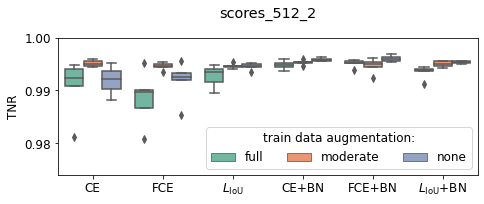

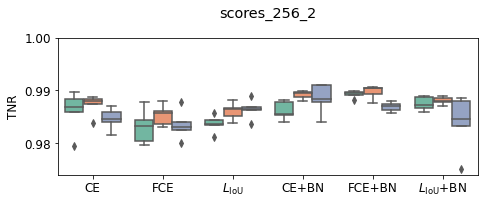

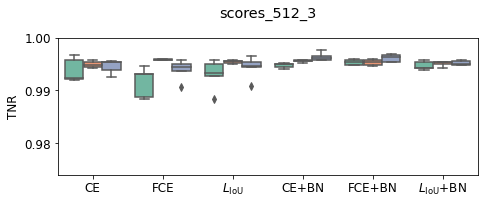

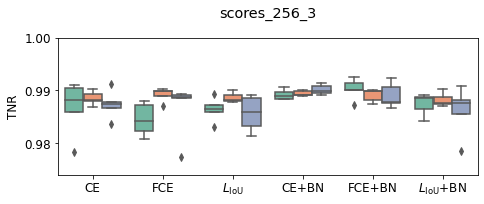

In [11]:
score = 'TNR'
first = True
for model, scores in scores_dict.items():
    df = scores.reset_index()
    plt.figure(figsize=(7, 3))
    ax = sns.boxplot(x='model', y=score, data=df, hue='aug', palette="Set2")
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(model, pad=20)
    plt.xlabel('')
    new_labels = change_labels(ax.get_xticklabels())
    ax.set_xticklabels(new_labels)
    plt.ylim([0.974, 1.])
    plt.ylabel(score)
    if first:
        handles, _ = ax.get_legend_handles_labels()
        plt.legend(title='train data augmentation:', handles=handles, labels=["full", "moderate", "none"], ncol=3, loc='lower right')
        first = False
    else:
        ax.legend().set_visible(False)
        
    #plt.locator_params(nbins=4)
    plt.tight_layout()
    plt.savefig(os.path.join(path_figs, f'boxplots_{model}_{score}.jpg'), dpi=300)
    plt.show()